In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import EarlyStopping

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)

AONtrainD = []
AONtrainL = []
AONtestD = []
AONtestL = []

oneis = 0
twous = 0
print(len(trainL))
for i in range(len(trainL)):
    if(trainL[i] != 2):
        if(trainL[i] == 3):
            trainL[i] = 2       
        AONtrainD.append(trainD[i])
        AONtrainL.append(trainL[i])


print("train ok")
for i in range(len(testL)):
    if(testL[i] != 2):
        if(testL[i] == 3):
            testL[i] = 2
        
        AONtestD.append(testD[i])
        AONtestL.append(testL[i]) 

AONtrainD = np.array(AONtrainD)
AONtrainL = np.array(AONtrainL)
AONtestD = np.array(AONtestD)
AONtestL = np.array(AONtestL)
        
print("test ok")

7110
train ok
test ok


In [3]:
trainData = AONtrainD.reshape((AONtrainD.shape[0], AONtrainD.shape[1], 1))
trainLabel = np_utils.to_categorical(AONtrainL, 3)
testData = AONtestD.reshape((AONtestD.shape[0], AONtestD.shape[1], 1))
testLabel = np_utils.to_categorical(AONtestL, 3)
print(trainData)
print(trainLabel.shape)

[[[ 0.519]
  [ 0.619]
  [ 0.723]
  ...
  [ 0.116]
  [ 0.017]
  [ 0.018]]

 [[-0.188]
  [-0.239]
  [-0.274]
  ...
  [-0.077]
  [-0.077]
  [-0.078]]

 [[-0.079]
  [-0.079]
  [-0.079]
  ...
  [-0.093]
  [-0.057]
  [ 0.   ]]

 ...

 [[ 0.058]
  [ 0.054]
  [ 0.049]
  ...
  [-0.015]
  [-0.013]
  [-0.01 ]]

 [[ 0.055]
  [ 0.078]
  [ 0.091]
  ...
  [-0.262]
  [-0.26 ]
  [-0.258]]

 [[ 0.154]
  [ 0.154]
  [ 0.168]
  ...
  [-0.223]
  [-0.174]
  [-0.12 ]]]
(2938, 3)


In [4]:
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))


model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))


model.add(Conv1D(filters = 64, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))


model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))


model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.15))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))


model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))


model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.45))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = "softmax"))

print(model.summary())
adam = Adam(lr = 0.001)
# early_stop = EarlyStopping(patience=25)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=25,
                            validation_data=(testData, testLabel),
#                             callbacks=[early_stop],
                            batch_size=70,
                            verbose=1)

# model.save('AON_Normal.h5')
model.save('AON_Normal_TST.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
activation_2 (Activation)    (None, 4491, 32)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2245, 32)          0         
__________

2938/2938 [==============================] - 3s 913us/step - loss: 0.2332 - acc: 0.9156 - val_loss: 0.4455 - val_acc: 0.8094
Epoch 18/25
2938/2938 [==============================] - 3s 888us/step - loss: 0.2421 - acc: 0.9037 - val_loss: 0.3726 - val_acc: 0.8628
Epoch 19/25
2938/2938 [==============================] - 3s 915us/step - loss: 0.1903 - acc: 0.9309 - val_loss: 0.3933 - val_acc: 0.8876
Epoch 20/25
2938/2938 [==============================] - 3s 905us/step - loss: 0.2004 - acc: 0.9248 - val_loss: 0.4273 - val_acc: 0.8716
Epoch 21/25
2938/2938 [==============================] - 3s 914us/step - loss: 0.1909 - acc: 0.9333 - val_loss: 0.3782 - val_acc: 0.8692
Epoch 22/25
2938/2938 [==============================] - 3s 933us/step - loss: 0.1913 - acc: 0.9268 - val_loss: 0.3607 - val_acc: 0.8596
Epoch 23/25
2938/2938 [==============================] - 3s 919us/step - loss: 0.1584 - acc: 0.9425 - val_loss: 0.3750 - val_acc: 0.8652
Epoch 24/25
2938/2938 [==============================

In [5]:
import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

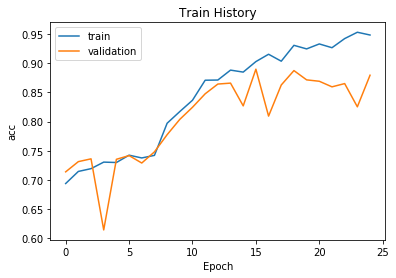

In [6]:
show_plot('acc', train_history_1)

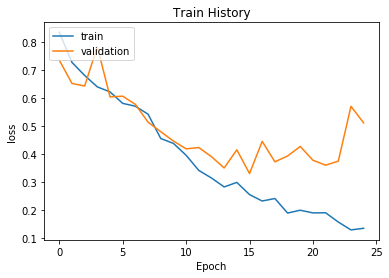

In [7]:
show_plot('loss', train_history_1)

In [8]:
evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

1254/1254 [==============================] - 1s 409us/step
Loss: 0.511, Accuracy: 0.880


In [9]:
import itertools
import pylab as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

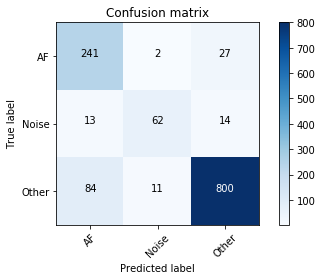

In [10]:
from sklearn.metrics import confusion_matrix
test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(AONtestL, test_prediction)
plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Other'],
                      title='Confusion matrix')